In [1]:
import pandas as pd
import numpy as np

ds = pd.read_csv("dataset/Emails.csv")
ds.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


Для экспериментов используется только колонка "RawText". Из текстов удаляется пунктуация. Фильтруются токены, содержащие специальные символы, а так же имеющие длину менее двух символов.

In [2]:
import string

PUNCTUATION = "!\"(),.:;?[]{}…“"
BAD_SYMBOLS = "#$%&*+/<=>@\^|~â©ñ¹_" + string.digits


def filtered(text):
    for symbol in BAD_SYMBOLS:
        if text.find(symbol) != -1 or len(text) < 2:
            return ''

    return text


def transform_raw_texts(raw_texts):
    transformed_texts = []
    
    for line in raw_texts:
        transformed_line = ""
        
        for character in PUNCTUATION:
            line = line.replace(character, " ")

        for word in line.strip('\n').split():
            filtered_word = filtered(word)

            if filtered_word != '':
                transformed_line += filtered_word.lower() + " "
                
        transformed_texts.append(transformed_line)

    return transformed_texts

In [3]:
texts = transform_raw_texts(ds["RawText"].tolist())

tokens = []
for text in texts:
    tokens += text.split()

print(len(texts))

7945


Найдем наиболее частотные биграммы

In [4]:
import collections
from itertools import islice

frequencies = collections.Counter(zip(tokens, islice(tokens, 1, None)))

print(frequencies.most_common(20))

[(('of', 'state'), 28129), (('department', 'of'), 27169), (('doc', 'no'), 26534), (('case', 'no'), 26527), (('state', 'case'), 26515), (('no', 'date'), 26510), (('unclassified', 'department'), 26509), (('no', 'doc'), 26508), (('of', 'the'), 14052), (('date', 'unclassified'), 12830), (('in', 'the'), 10284), (('release', 'in'), 7916), (('date', 'release'), 7501), (('original', 'message'), 7012), (('subject', 're'), 6728), (('to', 'the'), 6538), (('message', 'from'), 6115), (('pm', 'to'), 5613), (('on', 'the'), 5170), (('to', 'subject'), 4484)]


Выделим коллокации из двух слов по PMI с помощью nltk

In [5]:
import nltk
from nltk.collocations import BigramAssocMeasures
from nltk.collocations import BigramCollocationFinder

bigram_measures = nltk.collocations.BigramAssocMeasures()

finder = BigramCollocationFinder.from_words(tokens)
finder.nbest(bigram_measures.pmi, 20)

[("''rn", 'rince'),
 ("''s", 'pone'),
 ("'--", 'twatch'),
 ("'alexandre", "carl'"),
 ("'amitabh", "desai'"),
 ("'baby", "steps'"),
 ("'badly", "trained'"),
 ("'baer", 'danie'),
 ("'barry", "keith'"),
 ("'beitler", "ady'"),
 ("'benderslw", "matias'"),
 ("'big", "bang'"),
 ("'brian'", "'brocking"),
 ("'brocking", "elisabeth'"),
 ("'buhl", "cindy'"),
 ("'chang", "benjamin'"),
 ("'cheer", "on'"),
 ("'civ", "cas'"),
 ("'confidence", "building'"),
 ("'damage", "limitation'")]

Определим общее количество различных слов (все эксперименты ниже будут использовать только униграммы).

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(texts)

print(len(vectorizer.get_feature_names()))

43930


Необходим отбор наиболее значимых признаков. В качестве примера можно предложить схему отбора ключевых слов, описанную в статьях: 

1) Serge Sharoff. Classifying Web corpora into domain and genre using automatic feature identification. In Proc. ofWeb as CorpusWorkshop, Louvain-la-Neuve, 2007.

2) Serge Sharoff. Measuring the distance between comparable corpora between languages. In Serge Sharoff, Reinhard Rapp, Pierre Zweigenbaum, and Pascale Fung, editors, BUCC: Building and Using Comparable Corpora, pp. 113–129, Springer, 2013.

Для начала убираем некоторое количество наиболее частотных слов, считая их стоп словами. Затем для каждого текста выделяем набор ключевых слов с помощью критерия log-likelihood score (в экспериментах ниже пороговое значение = 10,83 для уровня значимости 0.001). Использование log-likelihood score связано с его лучшей устойчивостью на низкочастотных признаках (менее пяти вхождений).

Реализация, которая находится в следующей секции была мной написана существенно ранее, прошу прощения за возможную избыточность кода.

In [7]:
from math import log

def log_likelihood(a, b, c, d):
    if a == 0 or b == 0 or c == 0 or d == 0:
        return 0

    return 2 * (a * log(a) + b * log(b) + c * log(c) + d * log(d) + (a + b + c + d) * log(a + b + c + d) -
                (a + b) * log(a + b) - (a + c) * log(a + c) - (b + d) * log(b + d) - (c + d) * log(c + d))

def add_word_to_dict(current_dict, word):
    if word == '':
        return

    if current_dict.get(word) is None:
        current_dict[word] = 1
    else:
        current_dict[word] += 1


def add_text_to_dict(current_dict, text):
    for token in text.split():
        if current_dict.get(token) is None:
            current_dict[token] = 1
        else:
            current_dict[token] += 1


def reduce_lexicon_dimension(current_dict, stop_words_number):
    words = sorted(current_dict.items(), key=lambda x: -x[1])

    return {item[0]: item[1] for item in words[stop_words_number:]}, \
           {item[0]: item[1] for item in words[:stop_words_number]}


def current_text_keywords(current_text_dict, normative_dict, total_number_of_words, stop_words_dict, ll_score_threshold):
    for word in stop_words_dict:
        current_text_dict.pop(word, None)

    current_number_of_words = sum(current_text_dict.values())

    current_scores_dict = {}
    for word in current_text_dict:
        ll_score = log_likelihood(current_text_dict[word],
                                  normative_dict[word],
                                  current_number_of_words - current_text_dict[word],
                                  total_number_of_words - normative_dict[word])

        if ll_score >= ll_score_threshold:
            current_scores_dict[word] = ll_score

    return [item[0] for item in sorted(current_scores_dict.items(), key=lambda x: -x[1])]


def build_normative_dict(texts):
    result_dict = {}
    
    for text in texts:
        add_text_to_dict(result_dict, text)

    return result_dict


def get_keywords(texts, ll_score_threshold, normative_dict, stop_words_dict,
                 total_number_of_words, lexicon_dimension):

    keywords_dict = {}

    for text in texts:
        current_text_dict = {}
        add_text_to_dict(current_text_dict, text)

        current_keywords = current_text_keywords(current_text_dict, normative_dict, total_number_of_words,
                                                 stop_words_dict, ll_score_threshold)

        for word in current_keywords:
            add_word_to_dict(keywords_dict, word)

    return set([item[0] for item in sorted(keywords_dict.items(), key=lambda x: -x[1])[:lexicon_dimension]])


def extract_features(texts, keywords_vector_dimension, stop_words_num, lexicon_dimension, ll_score_threshold):

    normative_dict = build_normative_dict(texts)
    normative_dict, stop_words_dict = reduce_lexicon_dimension(normative_dict, stop_words_num)
    total_number_of_words = sum(normative_dict.values())
    
    keywords = get_keywords(texts, ll_score_threshold, normative_dict,
                            stop_words_dict, total_number_of_words, lexicon_dimension)
    
    keywords_for_texts = []
    
    for text in texts:
        current_text_dict = {}
        add_text_to_dict(current_text_dict, text)

        raw_current_keywords = current_text_keywords(current_text_dict, normative_dict, total_number_of_words,
                                                     stop_words_dict, ll_score_threshold)

        current_keywords = []

        for keyword in raw_current_keywords:
            if keyword in keywords:
                 current_keywords.append(keyword)
                    
        keywords_for_text = ""
        
        for keyword in current_keywords[:keywords_vector_dimension]:
            keywords_for_text += keyword + " "

        keywords_for_texts.append(keywords_for_text)

    return keywords_for_texts

In [8]:
from sklearn.cluster import KMeans
from sklearn.cluster.hierarchical import AgglomerativeClustering

def get_features_matrix(texts):
    vectorizer = CountVectorizer()
    matrix = vectorizer.fit_transform(texts)
    
    print("Vectorizer matrix shape: " + str(matrix.shape))
    
    return matrix.toarray()

def get_kmeans_clusters_map(texts, CLUSTERS_NUMBER):
    model = KMeans(n_clusters=CLUSTERS_NUMBER, random_state=1)
    return model.fit_predict(get_features_matrix(texts))

def get_agglomerative_clusters_map(texts, CLUSTERS_NUMBER):
    model = AgglomerativeClustering(n_clusters=CLUSTERS_NUMBER, affinity='euclidean', linkage='ward')
    return model.fit_predict(get_features_matrix(texts))

In [9]:
def clusters_as_texts(texts, clusters_map, CLUSTERS_NUMBER):
    clusters = ["" for i in range(CLUSTERS_NUMBER)]
    
    for i, text in enumerate(texts):
        clusters[clusters_map[i]] += text + " "
        
    return clusters

In [10]:
STOP_WORDS_NUM = 50 # количество игнорируемых высокочастотных слов
LEXICON_DIMENSION = 10000 # ограничение на длину вектора признаков
LL_SCORE_THRESHOLD = 10.83
CLUSTERS_NUMBER = 20

keywords_for_texts = extract_features(texts, LEXICON_DIMENSION, STOP_WORDS_NUM, LEXICON_DIMENSION, LL_SCORE_THRESHOLD)

In [11]:
clusters_map = get_kmeans_clusters_map(keywords_for_texts, CLUSTERS_NUMBER)

Vectorizer matrix shape: (7945, 9351)


Примененный выше алгоритм отбора признаков подходит также для визуализации получаемых кластеров. Кластеры теперь считаются едиными текстами, для которых по log-likelihood score отбираются ключевые слова относительно всего корпуса.

In [12]:
clusters = clusters_as_texts(texts, clusters_map, CLUSTERS_NUMBER)

In [13]:
KEYWORDS_VECTOR_DIMENSION = 30 # количество слов в выводе описания для кластера

keywords_for_clusters = extract_features(clusters, KEYWORDS_VECTOR_DIMENSION, 
                                         STOP_WORDS_NUM, LEXICON_DIMENSION, LL_SCORE_THRESHOLD)

for cluster_keywords in keywords_for_clusters:
    print(cluster_keywords + '\n')

lona valmoro schedule huma abedin assistant mtg maggie special shuttle friday do direct conference lady sunday secretary ashton fri cc friends dinner may mon sep monday june sun yes roberta 

checking sep sun lisa she's abedin huma see philadelphia santa ---- nyc bilat arrangements aren't timing supposed seeing tha i'd cm 

heal fistula africa hospital goma congolese kay lyn kivu lusi congo warren mrs excellent volcano local based training north visit trained centre teaching hey patients actors maniema recognized boss through 

kids griot griots supply centers education up materials supplies get ramp-up 'school' some olds schools teaching anothter maybe each cheap their who quicker cart educational linked portable meal teachers stipend 

el-keib source militias belhaj ntc minister fighting sensitive individual opinion army jalil al-juwali western haftar firms national benghazi zintan produced militiamen believes select el-keib's redactions foia misrata comm according waiver 

anne-mari

In [14]:
def analyze_clusters(clusters_map, clusters_number):
    number_of_documents = 0
    clusters_consistency = [0 for i in range(clusters_number)]

    for cluster in clusters_map:
        clusters_consistency[int(cluster)] += 1
        number_of_documents += 1

    for i in range(clusters_number):
        print(str(i) + ' ' + str(clusters_consistency[i]) + ' ' + str(clusters_consistency[i] / number_of_documents))

In [15]:
analyze_clusters(clusters_map, CLUSTERS_NUMBER)

0 213 0.026809314033983636
1 2 0.0002517306482064191
2 5 0.0006293266205160479
3 2 0.0002517306482064191
4 15 0.0018879798615481435
5 111 0.013971050975456261
6 3 0.0003775959723096287
7 21 0.0026431718061674008
8 120 0.015103838892385148
9 3 0.0003775959723096287
10 2 0.0002517306482064191
11 177 0.022278162366268093
12 2 0.0002517306482064191
13 10 0.0012586532410320957
14 3 0.0003775959723096287
15 3 0.0003775959723096287
16 7243 0.9116425424795469
17 6 0.0007551919446192574
18 2 0.0002517306482064191
19 2 0.0002517306482064191


Имеем много маленьких кластеров и один существенно больший, чем все остальные, что можно считать одним из признаков низкого качества получаемой кластеризации.

Можно попытаться использовать какую-либо меру качества, не требующую наличия эталонной кластеризации. Для примера использую silhouette_score из sklearn, но немного меняю код, чтобы по значениям для всех сэмплов можно было посчитать не только среднее, как в исходной реализации, но и медиану.  

In [16]:
from sklearn.metrics import silhouette_samples
from sklearn.utils import check_random_state

def silhouette_score_for_samples(features, labels, metric='euclidean', sample_size=None, random_state=None, **kwds):
    n_labels = len(np.unique(labels))
    n_samples = features.shape[0]
    if not 1 < n_labels < n_samples:
        raise ValueError("Number of labels is %d. Valid values are 2 "
                         "to n_samples - 1 (inclusive)" % n_labels)

    if sample_size is not None:
        random_state = check_random_state(random_state)
        indices = random_state.permutation(features.shape[0])[:sample_size]
        if metric == "precomputed":
            features, labels = features[indices].T[indices].T, labels[indices]
        else:
            features, labels = features[indices], labels[indices]
    return silhouette_samples(features, labels, metric=metric, **kwds)

In [17]:
samples_scores = silhouette_score_for_samples(get_features_matrix(keywords_for_texts), np.array(clusters_map), metric='cosine')
print(str(np.mean(samples_scores)) + " " + str(np.median(samples_scores)))

Vectorizer matrix shape: (7945, 9351)
-0.0183131416445 -0.0252192654352


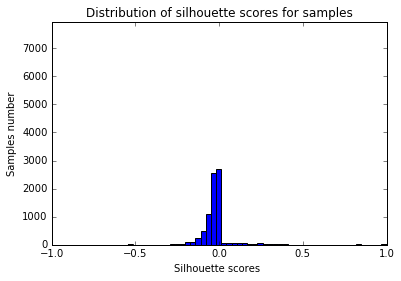

In [18]:
from matplotlib import pyplot as plt

%matplotlib inline

def bar_chart_for_samples_scores(samples_scores):
    plt.clf()
    plt.title("Distribution of silhouette scores for samples")
    plt.xlabel("Silhouette scores ")
    plt.ylabel("Samples number")
    plt.axis([-1, 1, 0, len(samples_scores)])

    plt.hist(samples_scores, bins=50)

    plt.show()

bar_chart_for_samples_scores(samples_scores)

Получаем отрицательные либо близкие к нулю значения. К сожалению, подсчет силуэта в данном случае нельзя считать свидетельством хорошего качества кластеризации.

Поставим точно такой же эксперимент для агломеративной кластеризации.

In [19]:
clusters_map = get_agglomerative_clusters_map(keywords_for_texts, CLUSTERS_NUMBER)

Vectorizer matrix shape: (7945, 9351)


In [20]:
clusters = clusters_as_texts(texts, clusters_map, CLUSTERS_NUMBER)

In [21]:
keywords_for_clusters = extract_features(clusters, KEYWORDS_VECTOR_DIMENSION, 
                                         STOP_WORDS_NUM, LEXICON_DIMENSION, LL_SCORE_THRESHOLD)

for cluster_keywords in keywords_for_clusters:
    print(cluster_keywords + '\n')

huma abedin benghazi sullivan jacob sensitive call redactions comm select dept foia waiver cc produced mills gov' part libyan lauren secretary's full jiloty information libya haiti agreement schedule aug tomorrow 

huma abedin lauren call jiloty mashabane aug sat tomorrow do list oprah can wed fax ok cc update calls mubarak sheet sep oscar thu tue morning secure him thx august 

magariaf libyan source libya sensitive benghazi qaddafi select redactions foia comm waiver western produced dept information agreement al individual oil el according gnc abushagur believes forces cabinet egyptian islamist these 

benghazi redactions foia comm waiver select produced dept sensitive information agreement house romney libya stevens attack rice pdb monica hanley security september gregory consulate huma protests abedin intelligence libyan pouch 

koch huma abedin mills jewish tea boehner ecumenical patriarchate public orthodox cc sullivan fw jacob call party turkish charles kochs shall your full bec

In [22]:
analyze_clusters(clusters_map, CLUSTERS_NUMBER)

0 1087 0.1368156073001888
1 390 0.04908747640025173
2 45 0.005663939584644431
3 97 0.012208936438011329
4 23 0.00289490245437382
5 17 0.0021397105097545627
6 5 0.0006293266205160479
7 178 0.022404027690371302
8 103 0.012964128382630585
9 5906 0.7433606041535556
10 17 0.0021397105097545627
11 12 0.0015103838892385148
12 7 0.000881057268722467
13 7 0.000881057268722467
14 2 0.0002517306482064191
15 20 0.0025173064820641915
16 3 0.0003775959723096287
17 2 0.0002517306482064191
18 14 0.001762114537444934
19 10 0.0012586532410320957


In [23]:
samples_scores = silhouette_score_for_samples(get_features_matrix(keywords_for_texts), np.array(clusters_map), metric='cosine')
print(str(np.mean(samples_scores)) + " " + str(np.median(samples_scores)))

Vectorizer matrix shape: (7945, 9351)
-0.00977399877909 -0.0260238920186


Ручная оценка качества может производиться по следующей схеме. Для случайной выборки текстов из каждого кластера асессор определяет долю текстов, не соответствующих автоматически составленному описанию кластера в виде ключевых слов с точки зрения того, как он склонен ее интерпретировать. Итоговое значение ошибки для группы таких асессоров находится как медиана их результатов.